In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

#df = pd.read_excel("C:\\Users\\Ashwath\\Desktop\\Wichtig\\Exactdata.xlsx")
# df = pd.read_excel(r'/content/Exactdata.xlsx')
# df.head()

from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

import seaborn as sns
#sns.lineplot(x=df.index, y=df.Cyclone_Inlet_Gas_Temp)

In [14]:
rawdata = pd.read_excel(r'/content/Exactdata.xlsx')
rawdata.set_index('time',inplace=True) 
rawdata.index= pd.to_datetime(rawdata.index)

rawdata.columns = rawdata.columns.str.replace(' ', '')
col_list = rawdata.columns
rawdata = rawdata.apply(pd.to_numeric,errors='coerce')

In [15]:
values = rawdata.values

In [9]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df = imp.fit_transform(values)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(df)
print (pca.explained_variance_ratio_)
df = pca.transform(df)

[1.]


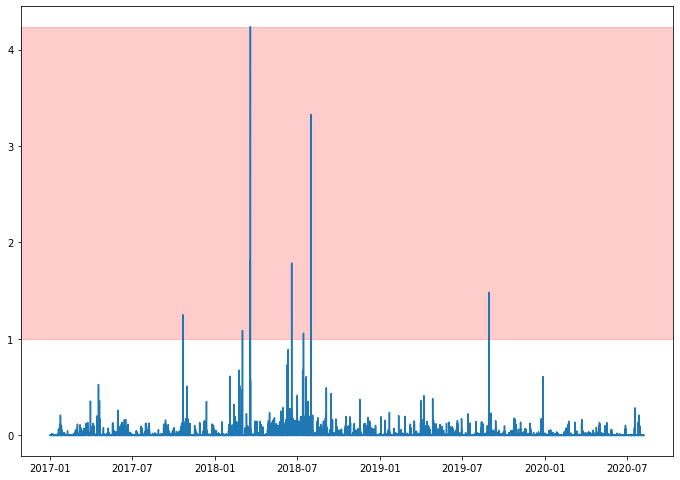

In [23]:
nbrs = NearestNeighbors(n_neighbors = 3,algorithm='ball_tree').fit(df)
distances, indexes = nbrs.kneighbors(df)

rawdata['knn_health'] = distances.mean(axis=1)
plt.plot(rawdata['knn_health'])
plt.axhspan(1,max(rawdata['knn_health']),alpha=0.2,color='red')

In [21]:
outlier_index = np.where(distances.mean(axis = 1) > 1)
outlier_index

(array([ 84622, 122321, 127262, 127355, 127357, 127358, 127368, 127396,
        127397, 127401, 153710, 161227, 165890, 279418]),)

In [22]:
for i in outlier_index:
    outlier_values = rawdata.iloc[i]
outlier_values

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,knn_health
time,,,,,,,
2017-10-21 19:50:00,1127.13,1096.70,-142.04,-170.90,964.92,-130.29,1.250212
2018-03-02 17:20:00,1095.63,1070.58,-298.50,-313.54,1053.22,-240.33,1.086653
2018-03-19 21:05:00,927.40,945.59,-280.96,-229.80,1374.80,-197.20,1.807684
2018-03-20 04:50:00,974.27,1022.13,-231.84,-203.07,1375.00,-173.65,4.236944
2018-03-20 05:00:00,904.99,966.59,-243.83,-212.12,1375.00,-184.92,1.642989
2018-03-20 05:05:00,971.58,1014.87,-244.16,-204.55,1375.00,-185.72,3.507768
2018-03-20 05:55:00,944.25,984.97,-238.52,-205.81,1349.55,-178.43,1.093797
2018-03-20 08:15:00,958.21,993.80,-259.21,-219.65,1346.07,-195.98,1.030392
2018-03-20 08:20:00,913.61,971.20,-251.54,-222.42,1375.00,-189.91,1.461324


In [ ]:
if rawdata["Cyclone_Inlet_Gas_Temp"] == outlier_values:
    print(rawdata[time])

In [13]:
df1 = rawdata.values
type(df1)

numpy.ndarray